<strong>YOU NEED TO HAVE btc_news_with_future_prices.csv FILE IN CURRENT DIRECTORY</strong>

In [9]:
import pandas as pd
import os

In [ ]:
result_data = pd.read_csv("btc_news_with_future_prices.csv")
result_data.head()

,Unnamed: 0,date_time,title,article_text,price_after_1m,price_change_1m_percent,price_after_5m,price_change_5m_percent,price_after_30m,price_change_30m_percent,price_after_1h,price_change_1h_percent,current_price
0,143673,2023-12-20 19:11:51,Immutable Hits 20-Month High as Gaming Tokens ...,NaN,44058.54,0.06,44121.23,0.20,43824.32,-0.47,43546.62,-1.10,44031.32
1,153088,2024-07-09 08:30:24,Swiss Crypto Bank Amina Partners Pyth Network ...,NaN,57694.01,-0.10,57714.18,-0.06,57620.01,-0.22,57660.01,-0.16,57749.90
2,39371,2018-07-05 17:23:20,Senior Loan ETF an Attractive Option in Rising...,This article was originally published onETFTre...,6554.99,-0.12,6566.01,0.04,6557.21,-0.09,6569.66,0.10,6563.17
3,88471,2024-02-20 13:19:00,4 Stocks to Watch as Bitcoin Regains $1 Trilli...,The cryptocurrency rally has resumed after a t...,52312.13,0.09,52281.83,0.03,52706.00,0.85,52207.99,-0.11,52263.61
4,179486,2025-05-04 16:08:35,"Bitcoin Price at $95,832: Are Bulls Back After...",NaN,95512.05,0.01,95445.61,-0.06,95351.52,-0.16,95444.17,-0.07,95507.25


In [4]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [5]:
def get_random_embeddings(data, embedding_dim=128):
    """
    Generates random embeddings for the given data.
    Args:
        data (pd.DataFrame): DataFrame containing the data for which embeddings are to be generated.
        embedding_dim (int): Dimension of the embeddings to be generated.
    Returns:
        np.ndarray: Random embeddings of shape (len(data), embedding_dim).
    """
    
    return np.random.randn(len(data), embedding_dim)

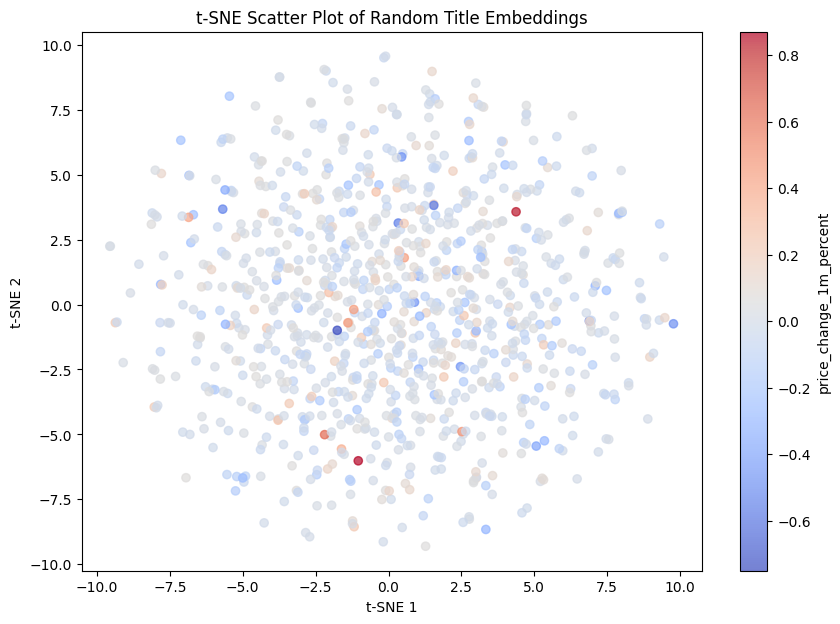

In [ ]:
embeddings = get_random_embeddings(result_data) # <------- Use embeddings from your model instead

# Visualize the embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=result_data['price_change_1m_percent'],
    cmap='coolwarm',
    alpha=0.7
)
plt.colorbar(scatter, label='price_change_1m_percent')
plt.title('t-SNE Scatter Plot of Random Title Embeddings')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [ ]:
# Idea: We can use the quantile-based discretization of price change to create classes and work with classification problem -> we can use metrics, 
# such as silhouette score or ARI (compare embedding based clusters with kmeans clasters after performing classification).

N_CLASSES = 3

In [ ]:
X = embeddings_2d
y = pd.qcut(result_data['price_change_1m_percent'], q=N_CLASSES, labels=list(range(N_CLASSES))) # Quantile-based discretization of price change into n classes

In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans


silhouette = silhouette_score(X, y)
print("Silhouette Score:", silhouette)

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=N_CLASSES, random_state=42).fit(X)
ari = adjusted_rand_score(y, kmeans.labels_)
print("Adjusted Rand Index:", ari)